# Stock Price Prediction using Continuous data stream and LSTMN

## Part 1 - Getting Data

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("DJI.csv")

In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2007-01-03,12459.540039,12580.349609,12404.820313,12474.519531,12474.519531,327200000
1,2007-01-04,12473.160156,12510.410156,12403.860352,12480.690430,12480.690430,259060000
2,2007-01-05,12480.049805,12480.129883,12365.410156,12398.009766,12398.009766,235220000
3,2007-01-08,12392.009766,12445.919922,12337.370117,12423.490234,12423.490234,223500000
4,2007-01-09,12424.769531,12466.429688,12369.169922,12416.599609,12416.599609,225190000


## Part 2 - Cleaning Data

In [4]:
import preprocess_data as ppd
import numpy as np

In [5]:
indices = ppd.remove_data(df)

In [6]:
print(indices.head())

   Item          Open         Close     Volume
0     0  24849.630859  24719.220703  270760000
1     1  24807.210938  24837.509766  200960000
2     2  24766.519531  24774.300781  225890000
3     3  24715.839844  24746.210938  208290000
4     4  24764.039063  24754.060547  255140000


## Part 3 - Visualizing Raw Data

In [7]:
import visualizeDJI

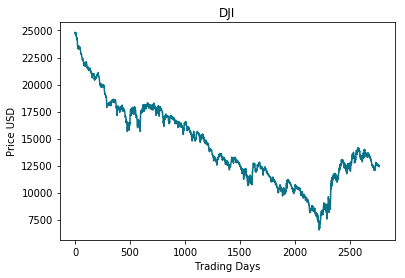

In [8]:
visualizeDJI.plot_basic(indices)

### Normalizing Data using MinMax Scaler

In [9]:
indices = ppd.get_normalised_data(indices)
print(indices.head())
print("\n")
print("Open   --- mean :", np.mean(indices['Open']),  "  \t Std: ", np.std(indices['Open']),  "  \t Max: ", np.max(indices['Open']),  "  \t Min: ", np.min(indices['Open']))
print("Close  --- mean :", np.mean(indices['Close']), "  \t Std: ", np.std(indices['Close']), "  \t Max: ", np.max(indices['Close']), "  \t Min: ", np.min(indices['Close']))
print("Volume --- mean :", np.mean(indices['Volume']),"  \t Std: ", np.std(indices['Volume']),"  \t Max: ", np.max(indices['Volume']),"  \t Min: ", np.min(indices['Volume']))

   Item      Open     Close    Volume
0     0  1.000000  0.993533  0.393618
1     1  0.997682  1.000000  0.288893
2     2  0.995459  0.996544  0.326297
3     3  0.992690  0.995008  0.299890
4     4  0.995324  0.995438  0.370182


Open   --- mean : 0.4264888675341315   	 Std:  0.20456388910550205   	 Max:  0.9999999999999999   	 Min:  0.0
Close  --- mean : 0.42698630130771525   	 Std:  0.20482323162451574   	 Max:  0.9999999999999999   	 Min:  0.0
Volume --- mean : 0.2689642521030362   	 Std:  0.1532098290684612   	 Max:  1.0   	 Min:  0.0


/home/samar/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


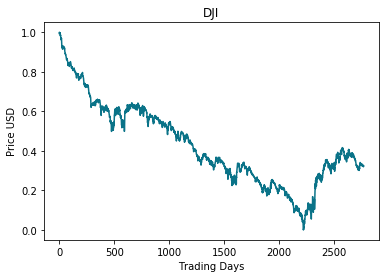

In [10]:
visualizeDJI.plot_basic(indices)

In [11]:
indices.to_csv('DJI_preprocessed.csv',index=False)

---

## Part 4 - Implementing Linear Regression for comparison

In [34]:
import math
import pandas as pd
import numpy as np
from IPython.display import display
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.model_selection import TimeSeriesSplit

In [35]:
indices = pd.read_csv("DJI_preprocessed.csv")

In [36]:
indices.head()

,Item,Open,Close,Volume
0,0,1.000000,0.993533,0.393618
1,1,0.997682,1.000000,0.288893
2,2,0.995459,0.996544,0.326297
3,3,0.992690,0.995008,0.299890
4,4,0.995324,0.995438,0.370182


In [37]:
import visualizeDJI as vs
import indices_data as ind_data
import LinearRegressionModel
display(indices.head())

,Item,Open,Close,Volume
0,0,1.000000,0.993533,0.393618
1,1,0.997682,1.000000,0.288893
2,2,0.995459,0.996544,0.326297
3,3,0.992690,0.995008,0.299890
4,4,0.995324,0.995438,0.370182


In [38]:
X_train, X_test, y_train, y_test, label_range= ind_data.train_test_split_linear_regression(indices)

print("x_train", X_train.shape)
print("y_train", y_train.shape)
print("x_test", X_test.shape)
print("y_test", y_test.shape)

x_train (1897, 1)
y_train (1897, 1)
x_test (872, 1)
y_test (872, 1)


## Checking predictions by Linear Regressor

In [39]:
model = LinearRegressionModel.build_model(X_train,y_train)


In [40]:
predictions = LinearRegressionModel.predict_prices(model,X_test, label_range)


## Visualizing results of Linear Regressor Model

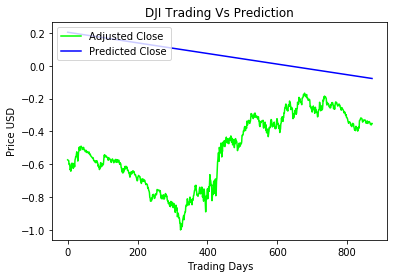

In [41]:
vs.plot_prediction(y_test,predictions)


### As it is very clear that a Linear Regression prediction model cannot be used to predict stock prices due to poor accuracy and predictions 

## Measuring accuracy of prediction

In [44]:
trainScore = mean_squared_error(X_train, y_train)
print('Train Score: %.4f MSE (%.4f RMSE)' % (trainScore, math.sqrt(trainScore)))

testScore = mean_squared_error(predictions, y_test)
print('Test Score: %.8f MSE (%.8f RMSE)' % (testScore, math.sqrt(testScore)))


Train Score: 0.6851 MSE (0.8277 RMSE)
Test Score: 0.40473790 MSE (0.63619014 RMSE)


---

## Part 5 - LSTM Model

In [47]:
import math
import pandas as pd
import numpy as np
from IPython.display import display

from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
from keras.metrics import mean_squared_error
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
import visualizeDJI as vs
import indices_data as ind_data
import LinearRegressionModel
import lstm, time

In [48]:
indices = pd.read_csv('DJI_preprocessed.csv')
indices_data = indices.drop(['Item'],axis=1)
#indices.head()
indices_data.head()

,Open,Close,Volume
0,1.000000,0.993533,0.393618
1,0.997682,1.000000,0.288893
2,0.995459,0.996544,0.326297
3,0.992690,0.995008,0.299890
4,0.995324,0.995438,0.370182


### Splitting between train and test data

In [49]:
X_train, X_test,y_train, y_test = ind_data.train_test_split_lstm(indices_data, 5)

unroll_length = 50
X_train = ind_data.unroll(X_train, unroll_length)
X_test = ind_data.unroll(X_test, unroll_length)
y_train = y_train[-X_train.shape[0]:]
y_test = y_test[-X_test.shape[0]:]

print("x_train", X_train.shape)
print("y_train", y_train.shape)
print("x_test", X_test.shape)
print("y_test", y_test.shape)

x_train (2213, 50, 3)
y_train (2213,)
x_test (446, 50, 3)
y_test (446,)


/home/samar/Desktop/Github Repos/Major-Project-Final/LSTM/indices_data.py:79: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  x_train = stocks[0:-prediction_time - test_data_cut].as_matrix()
/home/samar/Desktop/Github Repos/Major-Project-Final/LSTM/indices_data.py:80: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  y_train = stocks[prediction_time:-test_data_cut]['Close'].as_matrix()
/home/samar/Desktop/Github Repos/Major-Project-Final/LSTM/indices_data.py:83: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  x_test = stocks[0 - test_data_cut:-prediction_time].as_matrix()
/home/samar/Desktop/Github Repos/Major-Project-Final/LSTM/indices_data.py:84: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  y_test = stocks[prediction_time - test_data_cut:]['Close'].as_matrix()


### Building the model

In [50]:
model = lstm.build_basic_model(input_dim = X_train.shape[-1],output_dim = unroll_length, return_sequences=True)

# Compile the model
start = time.time()
model.compile(loss='mean_squared_error', optimizer='adam')
print('compilation time : ', time.time() - start)

compilation time :  0.03627490997314453


In [51]:
model.fit(
    X_train,
    y_train,
    epochs=1,
    validation_split=0.05)

Train on 2102 samples, validate on 111 samples
Epoch 1/1
2102/2102 [==============================] - 8s 4ms/step - loss: 0.0222 - val_loss: 0.0011


In [52]:
predictions = model.predict(X_test)


### Plotting results

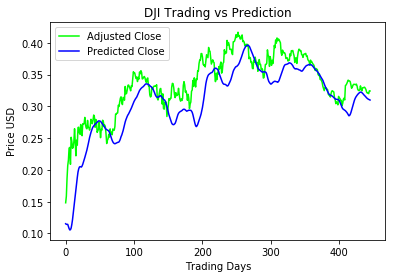

In [53]:
vs.plot_lstm_prediction(y_test,predictions)

In [59]:
trainScore = model.evaluate(X_train, y_train, verbose=0)
print('Train Score: %.8f MSE (%.8f RMSE)' % (trainScore, math.sqrt(trainScore)))

testScore = model.evaluate(X_test, y_test, verbose=0)
print('Test Score: %.8f MSE (%.8f RMSE)' % (testScore, math.sqrt(testScore)))
#print(accuracy_score(X_test,y_test))

Train Score: 0.00063835 MSE (0.02526557 RMSE)
Test Score: 0.00140884 MSE (0.03753452 RMSE)


## Part 6 - Improving LSTM Model

In [60]:
# Set up hyperparameters
batch_size = 100
epochs = 5

# build improved lstm model
model = lstm.build_improved_model( X_train.shape[-1],output_dim = unroll_length, return_sequences=True)

start = time.time()
#final_model.compile(loss='mean_squared_error', optimizer='adam')
model.compile(loss='mean_squared_error', optimizer='adam')
print('compilation time : ', time.time() - start)

compilation time :  0.04499697685241699


In [61]:
model.fit(X_train, 
          y_train, 
          batch_size=batch_size,
          epochs=epochs,
          verbose=2,
          validation_split=0.05
         )

Train on 2102 samples, validate on 111 samples
Epoch 1/5
 - 7s - loss: 0.0592 - val_loss: 0.0122
Epoch 2/5
 - 5s - loss: 0.0042 - val_loss: 0.0015
Epoch 3/5
 - 4s - loss: 0.0022 - val_loss: 0.0013
Epoch 4/5
 - 4s - loss: 0.0018 - val_loss: 7.2834e-04
Epoch 5/5
 - 4s - loss: 0.0018 - val_loss: 6.9087e-04


## Plotting Final results of LSTM improved Model

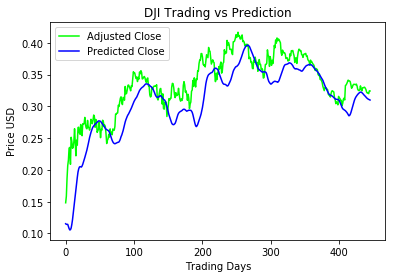

Train Score: 0.00067971 MSE (0.02607121 RMSE)
Test Score: 0.00097276 MSE (0.03118916 RMSE)


In [63]:

vs.plot_lstm_prediction(y_test,predictions)
trainScore = model.evaluate(X_train, y_train, verbose=0)
print('Train Score: %.8f MSE (%.8f RMSE)' % (trainScore, math.sqrt(trainScore)))

testScore = model.evaluate(X_test, y_test, verbose=0)
print('Test Score: %.8f MSE (%.8f RMSE)' % (testScore, math.sqrt(testScore)))

In [67]:
accuracy_score(y_test, normalize=False)

ValueError: Classification metrics can't handle a mix of unknown and continuous targets